In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import sys
import p5lib

%matplotlib inline

In [12]:
data = pd.read_csv('MERGED2013_PP.csv')
print "Number of features: {}".format(len(data.columns))
print "Number of rows: {}".format(len(data))

Number of features: 1729
Number of rows: 7804


In [13]:
data = p5lib.preprocess_data(data)
print "Num data after preprocessing: {}".format(len(data))
print "Num features: {}".format(len(data.columns))
# print data.shape


Num data after preprocessing: 6007
Num features: 45


In [14]:
X = data[['CONTROL', 'DEBT_MDN', 'DEP_INC_AVG', 'GRAD_DEBT_MDN', 'IND_INC_AVG', 'INEXPFTE', 'PAR_ED_PCT_1STGEN', 
          'PAR_ED_PCT_HS', 'PAR_ED_PCT_MS', 'PAR_ED_PCT_PS', 'PCTFLOAN', 'PCTPELL', 'UG25abv', 'UGDS', 
          'WDRAW_DEBT_MDN', 'L4_COLLEGE', 'NPT4', 'NUM4', 
          'PFTFTUG1_EF', 'PFTFAC',
          'SAT_AVG_ALL', 'ACTCMMID', 'ADM_RATE_ALL', 'AVGFACSAL', 'COSTT4_A',
          'C150', 'RET_FT']].dropna()
y = X[['C150', 'RET_FT']]
X = X.drop('C150', 1)
X = X.drop('RET_FT', 1)
print X.shape
print y.shape

# print X.PFTFTUG1_EF.describe()

(1210, 25)
(1210, 2)


In [15]:
from sklearn import preprocessing

tmpX = X[['DEBT_MDN', 'DEP_INC_AVG', 'GRAD_DEBT_MDN', 'IND_INC_AVG', 'INEXPFTE', 'UGDS', 'WDRAW_DEBT_MDN', 'NPT4', 
          'NUM4', 'SAT_AVG_ALL', 'ACTCMMID', 'AVGFACSAL', 'COSTT4_A']]

scaler = preprocessing.MinMaxScaler()
scaledX = scaler.fit_transform(tmpX)

# print np.array(tmpX.ix[0])
# print scaledX[0]

# X_for_PCA = pd.DataFrame(scaledX)
pctX = X[['PAR_ED_PCT_1STGEN', 'PAR_ED_PCT_HS', 'PAR_ED_PCT_MS', 'PAR_ED_PCT_PS', 'PCTFLOAN', 'PCTPELL', 'UG25abv', 
          'PFTFTUG1_EF', 'PFTFAC', 'ADM_RATE_ALL']]
pctX = np.array(pctX)

forPcaX = np.concatenate((scaledX, pctX), axis=1)
# print scaledX.shape
# print pctX.shape
print forPcaX.shape


(1210, 23)


In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=forPcaX.shape[1])
pca.fit(forPcaX)

# print pca.components_
print pca.explained_variance_ratio_


[  3.16257628e-01   1.73164702e-01   1.12819213e-01   7.91939545e-02
   7.80674005e-02   6.51524359e-02   3.85663143e-02   2.91864611e-02
   2.18495298e-02   1.80977204e-02   1.31349331e-02   1.03917544e-02
   1.01671138e-02   8.62855457e-03   7.64238311e-03   5.54657921e-03
   3.96454892e-03   3.27242079e-03   2.96323839e-03   1.27343293e-03
   6.59681299e-04   1.85675207e-19   9.47273654e-20]


In [17]:
pca = PCA(n_components=12)
pca.fit(forPcaX)
reducedX = pca.transform(forPcaX)
print reducedX.shape

(1210, 12)


In [18]:
# add the categorical feature

tmp1X = np.array(pd.get_dummies(X['CONTROL']))
tmp2X = X['L4_COLLEGE'].astype(int)
tmp2X = np.reshape(tmp2X, (len(tmp2X), 1)) 
print tmp1X.shape
print tmp2X.shape
print reducedX.shape
finalX = np.concatenate((reducedX, tmp1X, tmp2X), axis=1)
print finalX.shape

(1210, 3)
(1210, 1)
(1210, 12)
(1210, 16)


In [19]:
from sklearn import metrics
from sklearn import cross_validation as cv
from sklearn.tree import DecisionTreeRegressor

y = np.array(y)
X_train, X_test, y_train, y_test = cv.train_test_split(finalX, y, train_size=0.8)
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(968, 16)
(242, 16)
(968, 2)
(242, 2)


--- Completion ---
best params: {'epsilon': 0.10000000000000001, 'C': 10.0, 'gamma': 0.10000000000000001}
R2 score on train data: 0.844987446551
R2 score on test  data: 0.790717602948
--- Retention ---
best params: {'epsilon': 0.10000000000000001, 'C': 10.0, 'gamma': 0.10000000000000001}
R2 score on train data: 0.712546666394
R2 score on test  data: 0.690860981906


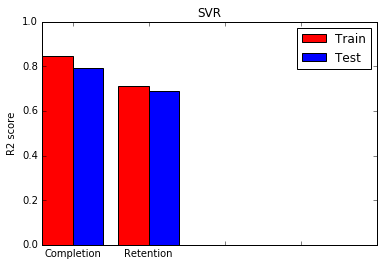

In [20]:
SVR_reg1, SVR_reg2, _, _ = p5lib.build_SVR_model(X_train, X_test, y_train, y_test, cv=3)

--- Completion ---
best params: {'max_depth': 4}
R2 score on train data: 0.77730416171
R2 score on test  data: 0.709452041969
--- Retention ---
best params: {'max_depth': 4}
R2 score on train data: 0.637899724077
R2 score on test  data: 0.565158670588


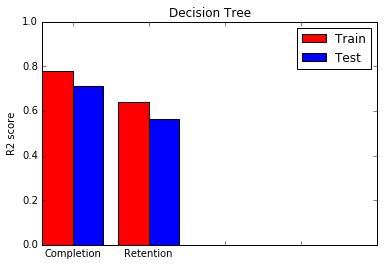

In [21]:
DT_reg1, DT_reg2, _, _ = p5lib.build_DecisionTree_model(X_train, X_test, y_train, y_test)

--- Completion ---
best params: {'n_neighbors': 13}
R2 score on train data: 0.811183677902
R2 score on test  data: 0.775748815783
--- Retention ---
best params: {'n_neighbors': 13}
R2 score on train data: 0.685257724967
R2 score on test  data: 0.701617613582


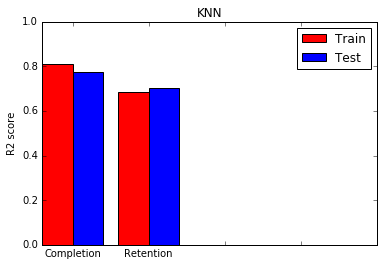

In [22]:
KNN_reg1, KNN_reg2, _, _ = p5lib.build_KNN_model(X_train, X_test, y_train, y_test)

--- Completion ---
R2 score on train data: 0.971149063705
R2 score on test  data: 0.783816354192
--- Retention ---
R2 score on train data: 0.952632234333
R2 score on test  data: 0.708525364124


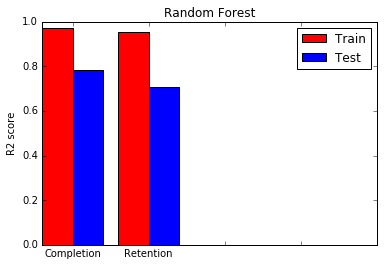

In [23]:
RForest_reg1, RForest_reg2, _, _ = p5lib.build_RandomForest_model(X_train, X_test, y_train, y_test, n_estimators=300)